# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

## Import

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys


## Code

### Task 1

Generate a random adjacency matrix for a simple undirected weighted graph of
100 vertices and 500 edges with assigned random positive integer weights.

In [31]:
num_vertices = 100
num_edges = 500

# create target matrix
adjacency_matrix = np.zeros((num_vertices, num_vertices))
for _ in range(num_edges):
    i, j = np.random.randint(0, num_vertices), np.random.randint(0, num_vertices)
    while i == j or adjacency_matrix[i, j] != 0:
        i, j = np.random.randint(0, num_vertices), np.random.randint(0, num_vertices)

    weight = np.random.randint(1, 100)
    adjacency_matrix[i, j], adjacency_matrix[j, i] = weight, weight


Generated graph visualisation:

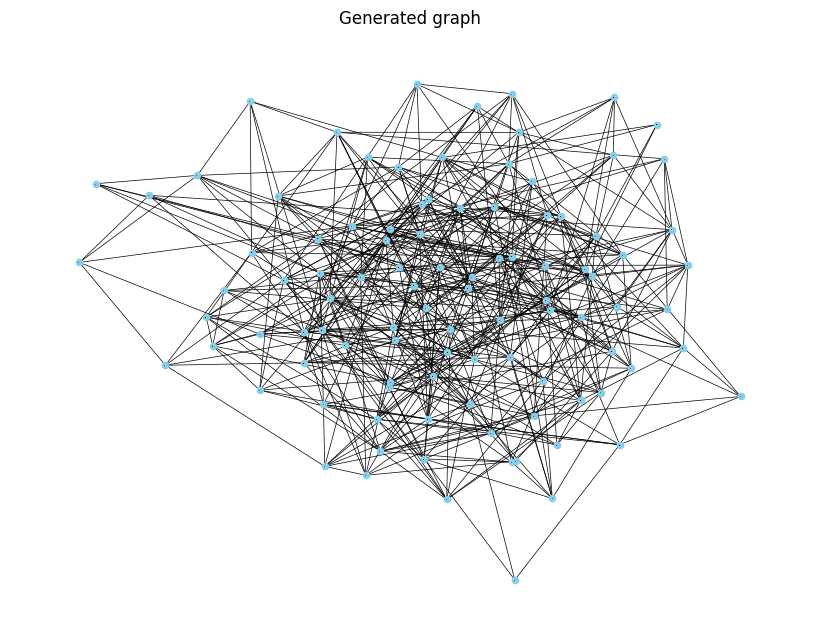

In [37]:
G = nx.from_numpy_array(adjacency_matrix)

# Compute the spring layout
pos = nx.spring_layout(G, iterations=100)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=20, node_color='skyblue', font_size=1, font_weight='bold', arrows=True, width=0.5)
plt.title("Generated graph")
plt.show()


In [38]:
import sys

class ShortestPath:
    def __init__(self, vertices, graph):
        self.V = vertices
        self.graph = graph

    def print_path(self, parent, j):
        if parent[j] == -1:
            print(j, end=" ")
            return
        self.print_path(parent, parent[j])
        print("->", j, end=" ")

    def print_solution(self, dist, parent, src):
        print("Vertex \tPath")
        for node in range(self.V):
            print(node, "\t", end="")
            self.print_path(parent, node)
            print()

    def min_distance(self, dist, spt_set):
        min_dist = sys.maxsize
        min_index = 0
        for v in range(self.V):
            if dist[v] < min_dist and not spt_set[v]:
                min_dist = dist[v]
                min_index = v
        return min_index

    def dijkstra(self, src, to_print=False):
        dist = [sys.maxsize] * self.V
        parent = [-1] * self.V
        dist[src] = 0
        spt_set = [False] * self.V

        for _ in range(self.V):
            u = self.min_distance(dist, spt_set)
            spt_set[u] = True

            for v in range(self.V):
                if (
                    self.graph[u][v] > 0
                    and not spt_set[v]
                    and dist[v] > dist[u] + self.graph[u][v]
                ):
                    dist[v] = dist[u] + self.graph[u][v]
                    parent[v] = u

        if to_print:
            self.print_solution(dist, parent, src)


    def bellman_ford(self, src, to_print=False):
        dist = [sys.maxsize] * self.V
        parent = [-1] * self.V
        dist[src] = 0

        for _ in range(self.V - 1):
            for u in range(self.V):
                for v in range(self.V):
                    if self.graph[u][v] != 0 and dist[u] + self.graph[u][v] < dist[v]:
                        dist[v] = dist[u] + self.graph[u][v]
                        parent[v] = u

        for u in range(self.V):
            for v in range(self.V):
                if self.graph[u][v] != 0 and dist[u] + self.graph[u][v] < dist[v]:
                    print("Graph contains negative weight cycle")
                    return

        if to_print:
            self.print_solution(dist, parent, src)


In [39]:
g = ShortestPath(num_vertices, adjacency_matrix)
target_vertex = np.random.randint(0, 99)


Here we can see Dijkstra and Bellman-Ford results for random chosen vertex:

In [50]:
print('Start vertex:', target_vertex)


Start vertex: 21


In [40]:
print('Dijkstra')
g.dijkstra(target_vertex, True)


Dijkstra
Vertex 	Path
0 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 -> 69 -> 0 
1 	21 -> 46 -> 3 -> 1 
2 	21 -> 46 -> 7 -> 74 -> 12 -> 2 
3 	21 -> 46 -> 3 
4 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 -> 69 -> 4 
5 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 -> 69 -> 4 -> 5 
6 	21 -> 46 -> 6 
7 	21 -> 46 -> 7 
8 	21 -> 46 -> 7 -> 74 -> 42 -> 98 -> 50 -> 97 -> 63 -> 8 
9 	21 -> 46 -> 7 -> 74 -> 42 -> 9 
10 	21 -> 46 -> 7 -> 74 -> 42 -> 98 -> 50 -> 97 -> 63 -> 10 
11 	21 -> 46 -> 7 -> 92 -> 11 
12 	21 -> 46 -> 7 -> 74 -> 12 
13 	21 -> 46 -> 7 -> 74 -> 42 -> 9 -> 53 -> 91 -> 13 
14 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 14 
15 	21 -> 27 -> 99 -> 36 -> 15 
16 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 56 -> 55 -> 16 
17 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 56 -> 55 -> 16 -> 17 
18 	21 -> 46 -> 7 -> 74 -> 42 -> 9 -> 18 
19 	21 -> 46 -> 66 -> 71 -> 19 
20 	21 -> 46 -> 7 -> 74 -> 42 -> 98 -> 50 -> 51 -> 20 
21 	21 
22 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 
23 	21 -> 46 -> 7 -> 74 -> 12 -> 88 -> 77 -> 23 
24 	21 -> 4

In [41]:
print('Bellman-Ford')
g.bellman_ford(target_vertex, True)


Bellman-Ford
Vertex 	Path
0 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 -> 69 -> 0 
1 	21 -> 46 -> 3 -> 1 
2 	21 -> 46 -> 7 -> 74 -> 12 -> 2 
3 	21 -> 46 -> 3 
4 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 -> 69 -> 4 
5 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 -> 69 -> 4 -> 5 
6 	21 -> 46 -> 6 
7 	21 -> 46 -> 7 
8 	21 -> 46 -> 7 -> 74 -> 42 -> 98 -> 50 -> 97 -> 63 -> 8 
9 	21 -> 46 -> 7 -> 74 -> 42 -> 9 
10 	21 -> 46 -> 7 -> 74 -> 42 -> 98 -> 50 -> 97 -> 63 -> 10 
11 	21 -> 46 -> 7 -> 92 -> 11 
12 	21 -> 46 -> 7 -> 74 -> 12 
13 	21 -> 46 -> 7 -> 74 -> 42 -> 9 -> 53 -> 91 -> 13 
14 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 14 
15 	21 -> 27 -> 99 -> 36 -> 15 
16 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 56 -> 55 -> 16 
17 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 56 -> 55 -> 16 -> 17 
18 	21 -> 46 -> 7 -> 74 -> 42 -> 9 -> 18 
19 	21 -> 46 -> 66 -> 71 -> 19 
20 	21 -> 46 -> 7 -> 74 -> 42 -> 98 -> 50 -> 51 -> 20 
21 	21 
22 	21 -> 46 -> 7 -> 74 -> 42 -> 61 -> 22 
23 	21 -> 46 -> 7 -> 74 -> 12 -> 88 -> 77 -> 23 
24 	21 

Perform experiment

In [42]:
n_experiments = 10
d_results = []
bf_results = []


for _ in range(n_experiments):

    d_start_time = time.time()
    _ = g.dijkstra(target_vertex)
    d_time = time.time() - d_start_time

    bf_start_time = time.time()
    _ = g.bellman_ford(target_vertex)
    bf_time = time.time() - bf_start_time

    d_results.append(d_time)
    bf_results.append(bf_time)


In [43]:
print('Dijkstra mean time:', np.mean(d_results))
print('BF mean time:',np.mean(bf_results))


Dijkstra mean time: 0.006398129463195801
BF mean time: 0.33550918102264404


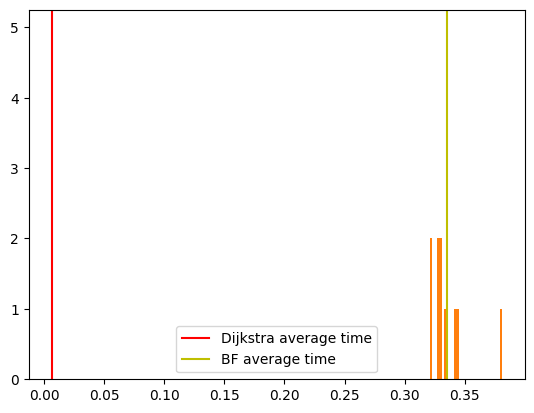

In [45]:
plt.hist(d_results, bins=30);
plt.axvline(np.mean(d_results), color='r', label='Dijkstra average time')


plt.hist(bf_results, bins=30);
plt.axvline(np.mean(bf_results), color='y', label='BF average time')
plt.legend()


In our case, Dijkstra's algorithm is approximately 52 times faster than the Bellman-Ford algorithm based on the mean execution times. These results are expected because Dijkstra's algorithm is generally more efficient for finding the shortest path in graphs with non-negative edge weights. While Bellman-Ford is capable of handling graphs with negative edge weights, its time complexity is higher, especially for dense graphs. As the size of the graphs increases, the time difference between Dijkstra's and Bellman-Ford algorithms could become even more pronounced. Therefore, the choice of algorithm should be made based on the specific characteristics of the graph and the application requirements. If negative edge weights are not a concern, Dijkstra's algorithm is the preferred option due to its significantly faster performance.

### Task 2

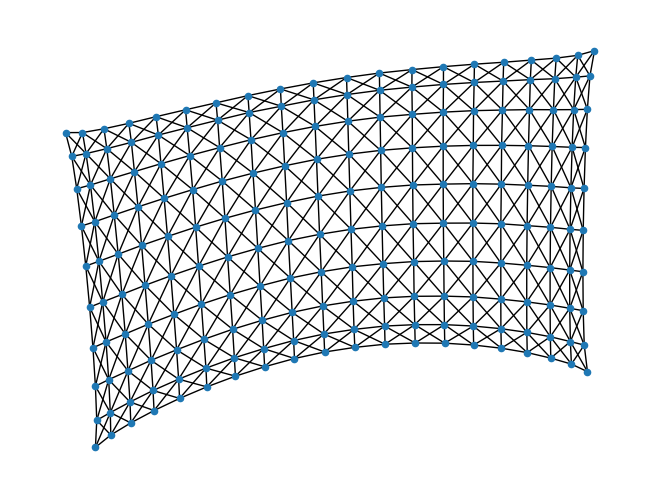

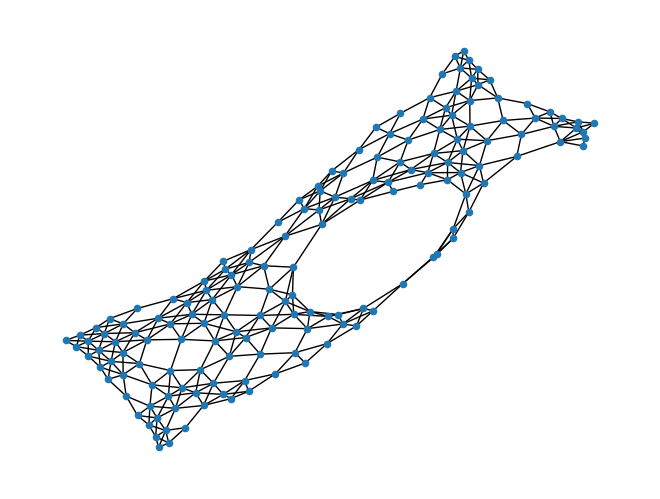

In [46]:
def generate_grid_graph(rows, cols, obstacle_count, add_diag=False):
    G = nx.grid_2d_graph(rows, cols)

    if add_diag:
        diagonal_edges = [((x, y), (x+1, y+1)) for x in range(rows - 1) for y in range(cols - 1)]
        anti_diagonal_edges = [((x+1, y), (x, y+1)) for x in range(rows - 1) for y in range(cols - 1)]
        G.add_edges_from(diagonal_edges + anti_diagonal_edges, weight=1.4)

    visualize_graph(G, nx.spring_layout(G, iterations=1000, seed=41))

    obstacle_cells = []
    while len(obstacle_cells) != obstacle_count:
        point = (np.random.randint(0, rows), np.random.randint(0, cols))
        if point not in obstacle_cells:
            obstacle_cells.append(point)
    G.remove_nodes_from(obstacle_cells)

    layout = nx.spring_layout(G, iterations=1000, seed=41)
    visualize_graph(G, layout)

    return G, obstacle_cells, layout

def visualize_graph(G, pos):
    nx.draw(G, pos, node_size=20)
    plt.show()

rows, cols = 10, 20
obstacle_count = 40
graph, obstacles, layout = generate_grid_graph(rows, cols, obstacle_count, True)


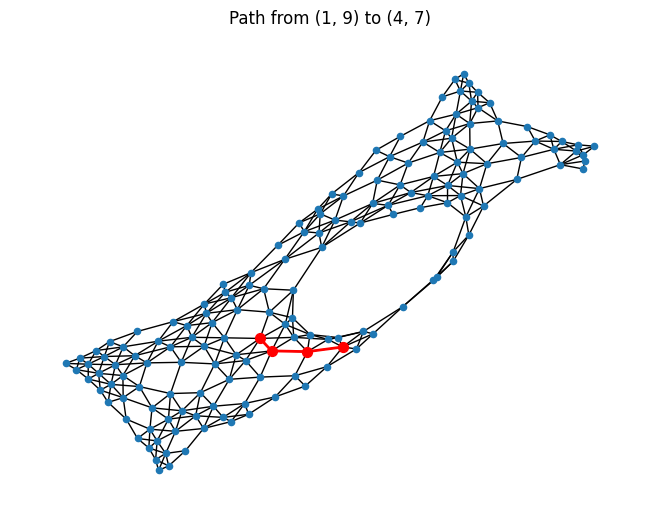

Path from (1, 9) to (4, 7): [(1, 9), (2, 8), (3, 7), (4, 7)]


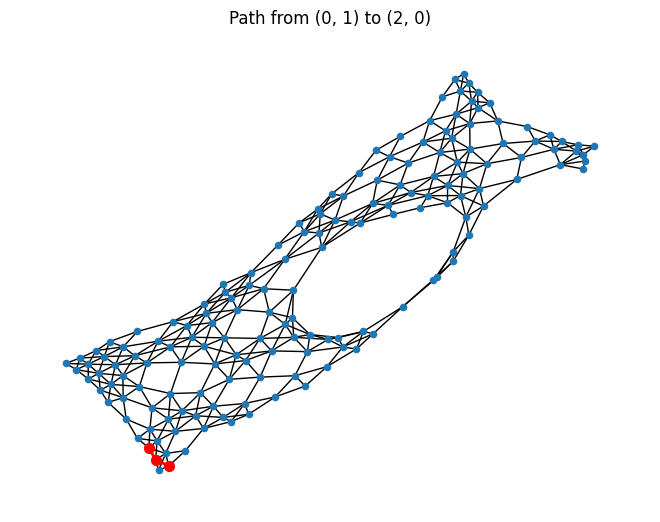

Path from (0, 1) to (2, 0): [(0, 1), (1, 0), (2, 0)]


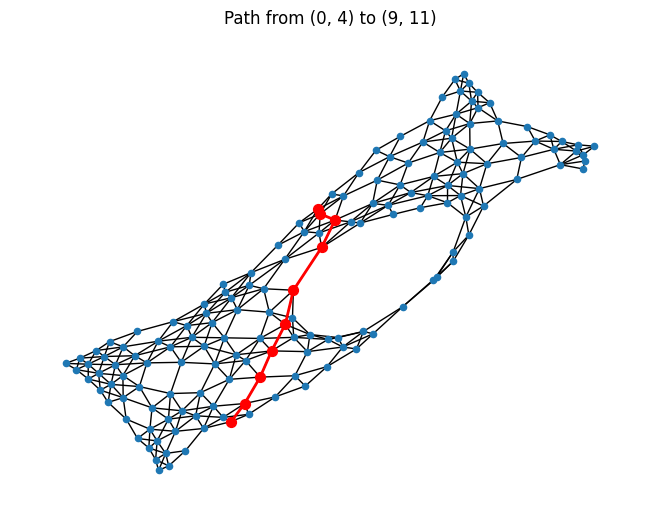

Path from (0, 4) to (9, 11): [(0, 4), (1, 5), (2, 6), (3, 7), (4, 8), (5, 9), (6, 10), (7, 11), (8, 11), (9, 11)]


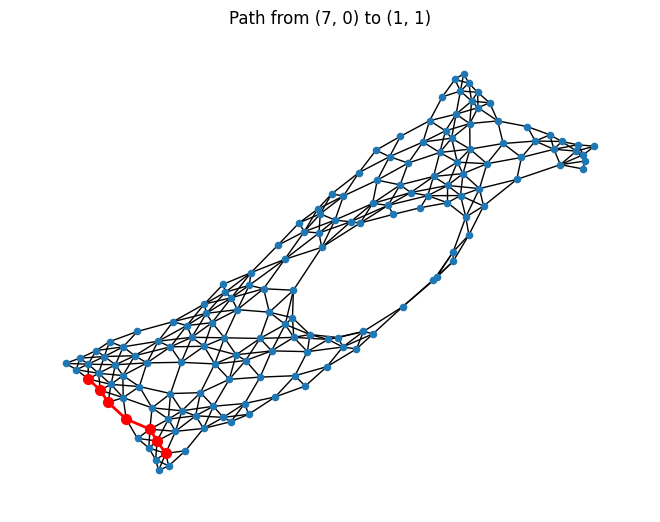

Path from (7, 0) to (1, 1): [(7, 0), (6, 0), (5, 0), (4, 0), (3, 1), (2, 1), (1, 1)]


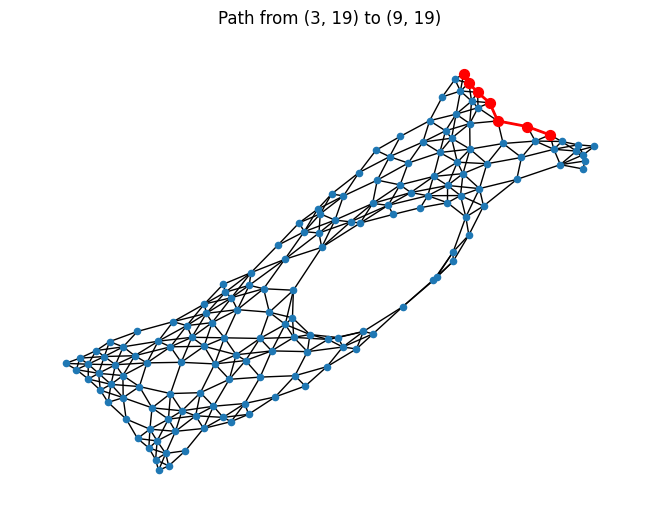

Path from (3, 19) to (9, 19): [(3, 19), (4, 19), (5, 18), (6, 19), (7, 19), (8, 19), (9, 19)]


In [69]:
def heuristic(node, goal):
    # Define a heuristic function (e.g., Manhattan distance)
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

results = []
for _ in range(5):
    start, target = (np.random.randint(0, rows), np.random.randint(0, cols)), (np.random.randint(0, rows), np.random.randint(0, cols))
    while start == target or start in obstacles or target in obstacles:
        start = (np.random.randint(0, rows), np.random.randint(0, cols))
        target = (np.random.randint(0, rows), np.random.randint(0, cols))

    a_time = time.perf_counter()
    path = nx.astar_path(graph, start, target, heuristic)
    a_end_time = (time.perf_counter() - a_time) * 1000 # convert to miliseconds
    results.append((len(path), a_end_time))

    # Plotting the path
    plt.figure()
    nx.draw(graph, layout, node_size=20)
    nx.draw_networkx_nodes(graph, layout, nodelist=path, node_color='r', node_size=50)
    nx.draw_networkx_edges(graph, layout, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    plt.title(f"Path from {start} to {target}")
    plt.show()

    print(f"Path from {start} to {target}: {path}")


In [71]:
results


[(4, 0.07129996083676815),
 (3, 0.041899969801306725),
 (10, 0.12960005551576614),
 (7, 0.10379997547715902),
 (7, 0.07800001185387373)]

The A* algorithm demonstrates efficiency by consistently achieving fast execution times across paths of varying lengths, ranging from milliseconds to low fractions of a second. This performance stability indicates its ability to handle different scenarios effectively, making it a reliable choice for pathfinding tasks.

### 3. Data structures & design techniques

### Data Structures:

####  **Adjacency Matrix:**
An adjacency matrix is a 2D array of size V x V (where V is the number of vertices in the graph). For an undirected graph, the matrix is symmetric. For a directed graph, the matrix may not be symmetric. Each cell `matrix[i][j]` in the adjacency matrix represents the weight of the edge from vertex `i` to vertex `j`. If there is no edge between the vertices, the value is often set to a special marker (like infinity). An adjacency matrix is simple and intuitive but can be inefficient in terms of space usage for sparse graphs (graphs where the number of edges is significantly less than the maximum possible edges).

### Design Techniques and Greedy Algorithm:

#### 1. **Greedy Algorithm:**
Greedy algorithms make locally optimal choices at each step with the hope of finding a global optimum. They make the best possible decision at each step by considering the current state of the problem, without worrying about the consequences of this decision on future steps.

#### 2. **Greedy Approach in Dijkstra's Algorithm:**
Dijkstra's algorithm uses a greedy approach. At each step, it selects the vertex with the smallest tentative distance from the source node and explores its neighbors. By always choosing the vertex with the smallest distance, Dijkstra's algorithm ensures that it explores the shortest paths first, ultimately finding the shortest path from the source to all other vertices.

#### 3. **Dynamic Programming in Bellman-Ford Algorithm:**
Bellman-Ford algorithm utilizes dynamic programming principles. It solves subproblems by finding the shortest paths from the source to all vertices that have at most `i` edges. It then uses these solutions to solve larger subproblems with `i + 1` edges. This process continues until the shortest paths with `V - 1` edges (where `V` is the number of vertices) are found, ensuring the shortest paths from the source to all vertices.

#### 4. **A* Algorithm and Heuristic Function:**
A* algorithm combines the principles of Dijkstra's algorithm and greedy algorithms. It uses a heuristic function (h) that estimates the cost from the current node to the goal. A* evaluates nodes based on a combined cost function `f(n) = g(n) + h(n)`, where `g(n)` is the cost of the path from the start node to node `n`, and `h(n)` is the heuristic estimate of the cost from `n` to the goal. The greedy choice in A* is to select the node with the smallest `f(n)` value, making it a guided greedy search towards the goal node. The heuristic function ensures that A* explores paths that are more likely to lead to an optimal solution.

In summary, these design techniques and algorithms leverage data structures like adjacency matrices and dynamic programming principles along with the greedy approach to efficiently find optimal solutions to various graph-related problems. The choice of algorithm depends on the specific problem constraints and characteristics of the graph being processed.

### 4. Conclusion

In this study, our objective was to assess the efficiency of Dijkstra's, Bellman-Ford, and A algorithms in specific scenarios.

On our synthetic data Dijkstra's algorithm significantly outperforms the Bellman-Ford algorithm, being approximately 52 times faster on average. This speed advantage is especially prominent in dense graphs, making Dijkstra's algorithm the preferred choice for scenarios with non-negative edge weights.

Furthermore, the A algorithm consistently demonstrated rapid execution times, ranging from milliseconds to fractions of a second, across paths of different lengths. This consistent performance underscores its versatility and reliability for diverse pathfinding tasks, positioning it as a top choice for real-time applications.*

Our findings underscore the critical importance of selecting algorithms based on the specific graph characteristics and problem nature. Dijkstra's algorithm excels in scenarios with non-negative edge weights due to its exceptional speed, while the A algorithm proves to be a reliable solution for pathfinding tasks across various graph structures.
